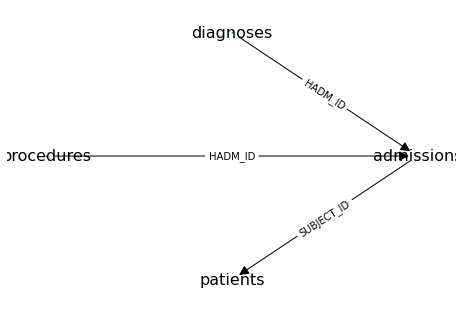

In [23]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

datapath = '../data/physionet.org/mimic-iii-demo/1.4/'
# Load CSV files into pandas dataframes
admissions = pd.read_csv(os.path.join(datapath, 'ADMISSIONS.csv'))
diagnoses = pd.read_csv(os.path.join(datapath, 'DIAGNOSES_ICD.csv'))
procedures = pd.read_csv(os.path.join(datapath, 'PROCEDURES_ICD.csv'))
patients = pd.read_csv(os.path.join(datapath, 'PATIENTS.csv'))

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each table
G.add_nodes_from(['admissions', 'diagnoses', 'procedures', 'patients'])

# Add edges between tables based on common columns
G.add_edges_from([('admissions', 'patients', {'label': 'SUBJECT_ID'}),
                  ('diagnoses', 'admissions', {'label': 'HADM_ID'}),
                  ('procedures', 'admissions', {'label': 'HADM_ID'})])

# Draw the graph
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1)
nx.draw_networkx_edges(G, pos, width=1, arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=16, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['label'] for u, v, d in G.edges(data=True)})

# Set the margin to 0.02
plt.subplots_adjust(left=-0.02, right=1.02, top=1.02, bottom=-0.02)
plt.axis('off')
plt.show()